In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Iris 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 형태 확인
print(f'X_scaled shape: {X_scaled.shape}')
print(f'y shape: {y.shape}')


X_scaled shape: (150, 4)
y shape: (150,)


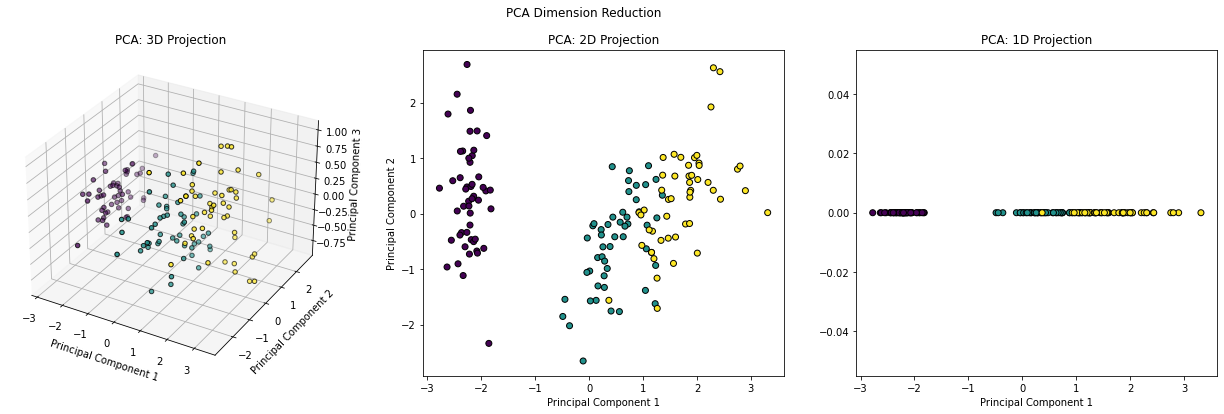

PCA explained variance ratios (3D): [0.72962445 0.22850762 0.03668922]
PCA explained variance ratios (2D): [0.72962445 0.22850762]
PCA explained variance ratios (1D): [0.72962445]


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA를 사용하여 3차원, 2차원, 1차원으로 축소
pca_3d = PCA(n_components=3)
pca_2d = PCA(n_components=2)
pca_1d = PCA(n_components=1)

X_pca_3d = pca_3d.fit_transform(X_scaled)
X_pca_2d = pca_2d.fit_transform(X_scaled)
X_pca_1d = pca_1d.fit_transform(X_scaled)

explained_variance_pca_3d = pca_3d.explained_variance_ratio_
explained_variance_pca_2d = pca_2d.explained_variance_ratio_
explained_variance_pca_1d = pca_1d.explained_variance_ratio_

# PCA 결과 시각화
fig = plt.figure(figsize=(22, 6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, edgecolor='k', marker='o')
ax.set_title('PCA: 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.subplot(132)
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, edgecolor='k', marker='o')
plt.title('PCA: 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(133)
plt.scatter(X_pca_1d, np.zeros_like(X_pca_1d), c=y, edgecolor='k', marker='o')
plt.title('PCA: 1D Projection')
plt.xlabel('Principal Component 1')

plt.suptitle('PCA Dimension Reduction')
plt.show()

print(f'PCA explained variance ratios (3D): {explained_variance_pca_3d}')
print(f'PCA explained variance ratios (2D): {explained_variance_pca_2d}')
print(f'PCA explained variance ratios (1D): {explained_variance_pca_1d}')


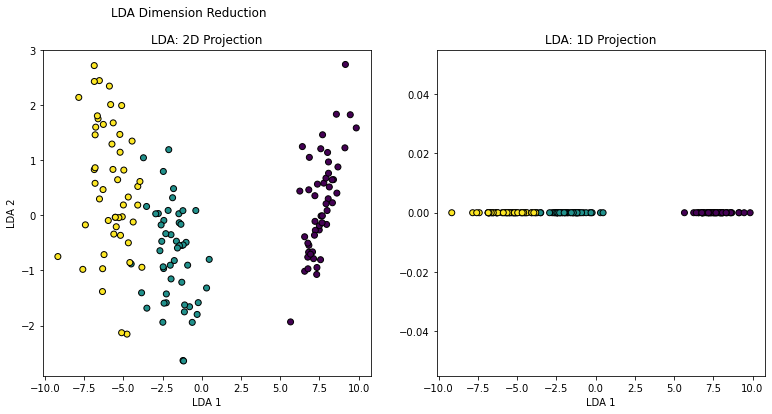

LDA explained variance ratios (2D): [0.9912126 0.0087874]
LDA explained variance ratios (1D): [0.9912126]


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA를 사용하여 2차원, 1차원으로 축소
lda_2d = LDA(n_components=2)
lda_1d = LDA(n_components=1)

X_lda_2d = lda_2d.fit_transform(X_scaled, y)
X_lda_1d = lda_1d.fit_transform(X_scaled, y)

explained_variance_lda_2d = lda_2d.explained_variance_ratio_
explained_variance_lda_1d = lda_1d.explained_variance_ratio_

# LDA 결과 시각화
fig = plt.figure(figsize=(20, 6))

plt.subplot(132)
plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=y, edgecolor='k', marker='o')
plt.title('LDA: 2D Projection')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')

plt.subplot(133)
plt.scatter(X_lda_1d, np.zeros_like(X_lda_1d), c=y, edgecolor='k', marker='o')
plt.title('LDA: 1D Projection')
plt.xlabel('LDA 1')

plt.suptitle('LDA Dimension Reduction')
plt.show()

print(f'LDA explained variance ratios (2D): {explained_variance_lda_2d}')
print(f'LDA explained variance ratios (1D): {explained_variance_lda_1d}')


In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# SVM 모델을 위한 데이터 분할
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train_lda, X_test_lda, _, _ = train_test_split(X_lda, y, test_size=0.3, random_state=42)

# SVM 커널 비교
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm_pca = SVC(kernel=kernel)
    svm_pca.fit(X_train_pca, y_train)
    y_pred_pca = svm_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    svm_lda = SVC(kernel=kernel)
    svm_lda.fit(X_train_lda, y_train)
    y_pred_lda = svm_lda.predict(X_test_lda)
    accuracy_lda = accuracy_score(y_test, y_pred_lda)

    results[kernel] = {'PCA Accuracy': accuracy_pca, 'LDA Accuracy': accuracy_lda}

# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)


         PCA Accuracy  LDA Accuracy
linear       0.933333      1.000000
poly         0.933333      0.977778
rbf          0.933333      1.000000
sigmoid      0.866667      0.977778


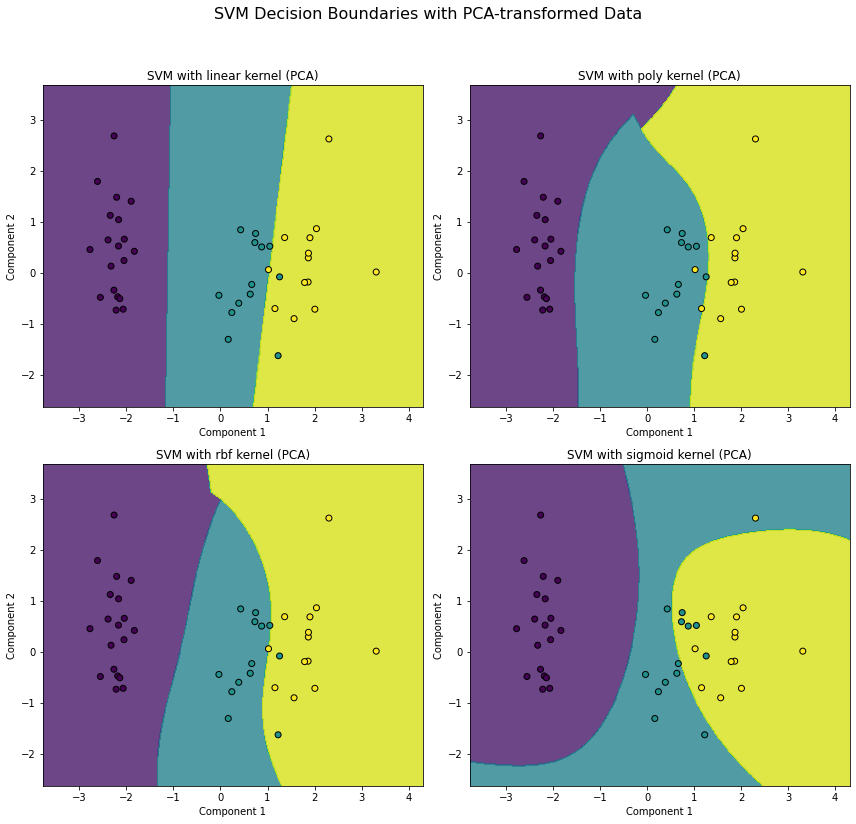

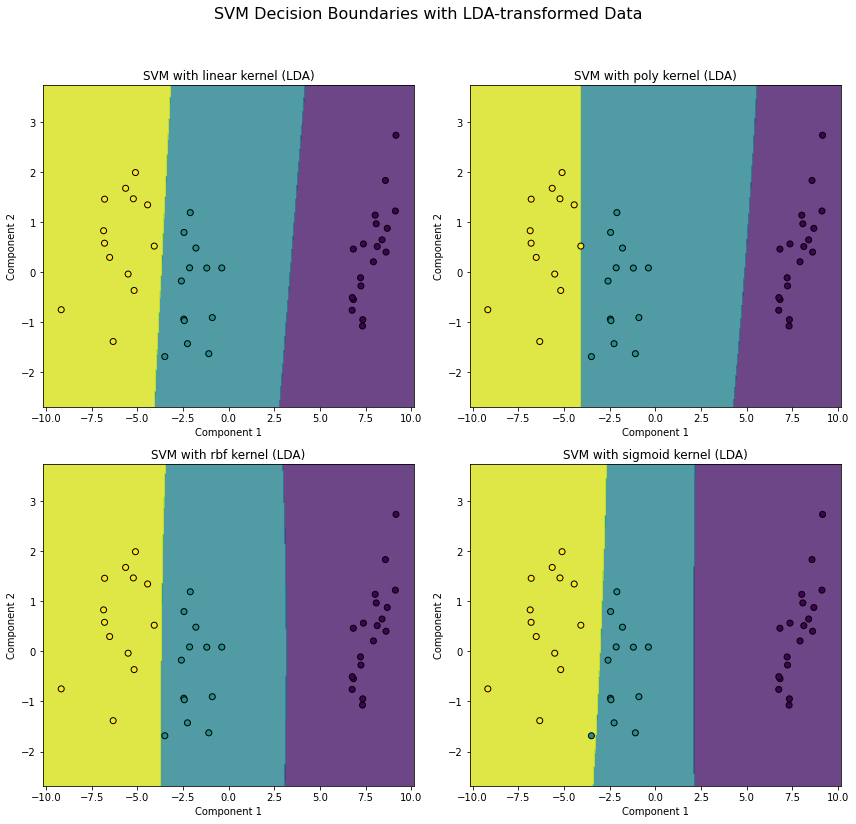

In [28]:
def plot_decision_boundaries(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)

# PCA 기반 SVM 결정 경계 시각화
plt.figure(figsize=(12, 12))
for i, kernel in enumerate(kernels):
    svm_pca = SVC(kernel=kernel)
    svm_pca.fit(X_train_pca, y_train)
    plt.subplot(2, 2, i + 1)
    plot_decision_boundaries(X_test_pca, y_test, svm_pca, f'SVM with {kernel} kernel (PCA)')

plt.suptitle('SVM Decision Boundaries with PCA-transformed Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# LDA 기반 SVM 결정 경계 시각화
plt.figure(figsize=(12, 12))
for i, kernel in enumerate(kernels):
    svm_lda = SVC(kernel=kernel)
    svm_lda.fit(X_train_lda, y_train)
    plt.subplot(2, 2, i + 1)
    plot_decision_boundaries(X_test_lda, y_test, svm_lda, f'SVM with {kernel} kernel (LDA)')

plt.suptitle('SVM Decision Boundaries with LDA-transformed Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
